In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
G = io.load('DiG_train')
targets = io.load('adj_train_full')
edges_all = io.load('edges_all')
edges_test = io.load('edges_test')

2019-07-01 00:52:11,547 - INFO - Loading data from `DiG_train` (PickleLocalDataSet)...


In [4]:
test_sources, test_sinks = zip(*edges_test)

In [32]:
degrees = zip(*[(len(set(G.predecessors(n))), len(set(G.successors(n)))) for n in G.nodes()]

In [33]:
in_degrees, out_degrees = zip(*degrees)

In [64]:
df = pd.DataFrame({"in": in_degrees, "out": out_degrees}); df.head()

,in,out
0,142,143
1,37,20
2,76,79
3,28,26
4,107,222


In [69]:
df["log_in"] = np.log(1 + df["in"])
df["log_out"] = np.log(1 + df["out"])
df.head()

,in,out,log_in,log_out
0,142,143,4.962845,4.969813
1,37,20,3.637586,3.044522
2,76,79,4.343805,4.382027
3,28,26,3.367296,3.295837
4,107,222,4.682131,5.407172


In [57]:
source_bin = [int(n in targets.keys()) for n in G.nodes()]

In [71]:
df["source"] = source_bin; df.head(n = 10)d

,in,out,log_in,log_out,source
0,142,143,4.962845,4.969813,1
1,37,20,3.637586,3.044522,1
2,76,79,4.343805,4.382027,1
3,28,26,3.367296,3.295837,1
4,107,222,4.682131,5.407172,1
5,57,119,4.060443,4.787492,1
6,62,80,4.143135,4.394449,1
7,44,40,3.806662,3.713572,1
8,330,261,5.802118,5.568345,1
9,95,118,4.564348,4.779123,1


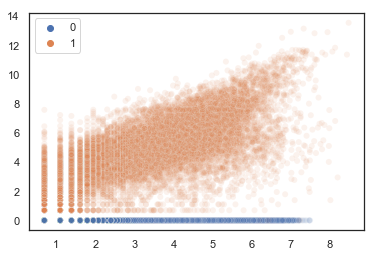

In [58]:
with sns.axes_style("white"):
    sns.scatterplot(log_in_degrees, log_out_degrees, hue = source_bin, alpha = 0.1)

In [59]:
test_sources_bin = [int(n in test_sources) for n in G.nodes()]
test_sinks_bin = [int(n in test_sinks) for n in G.nodes()]

In [81]:
df["test_source"] = test_sources_bin
df["test_sink"] = test_sinks_bin

def test_type(n):
    if n.test_source and not n.test_sink:
        return "source"
    elif not n.test_source and n.test_sink:
        return "sink"
    elif n.test_source and n.test_sink:
        return "both"
    else:
        return "none"
    
df["test_type"] = df.apply(test_type, axis = 1)
df.head(n = 20)

,in,out,log_in,log_out,source,test_source,test_sink,test_type
0,142,143,4.962845,4.969813,1,1,0,source
1,37,20,3.637586,3.044522,1,0,0,none
2,76,79,4.343805,4.382027,1,0,0,none
3,28,26,3.367296,3.295837,1,0,0,none
4,107,222,4.682131,5.407172,1,0,0,none
5,57,119,4.060443,4.787492,1,0,0,none
6,62,80,4.143135,4.394449,1,0,0,none
7,44,40,3.806662,3.713572,1,0,0,none
8,330,261,5.802118,5.568345,1,1,0,source
9,95,118,4.564348,4.779123,1,0,0,none


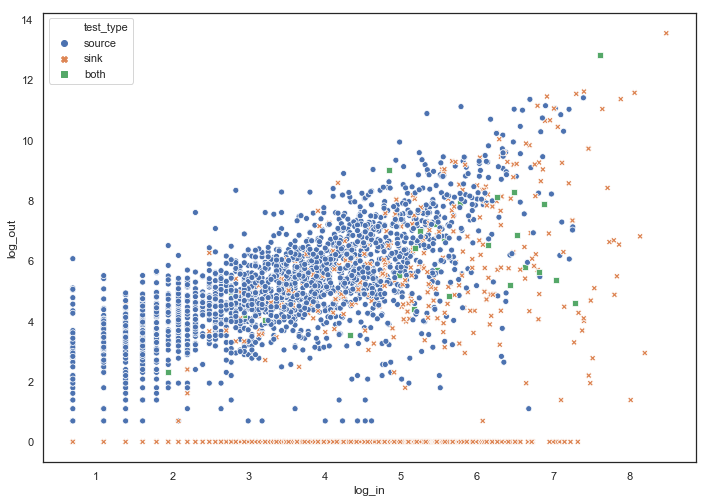

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = "white")
sns.scatterplot("log_in", "log_out", hue = "test_type", style = "test_type", data = df[df.test_type != "none"])